### Building Chatbot With Multiple Tools Using Langgraph

#### Aim
Create a chatbot with tool capabilities from arxiv, wikipedia search and some functions

In [ ]:
#Default Tools
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper


In [4]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [8]:
# arxiv.invoke("Attention iss all you need")

In [10]:
import time
from arxiv import Client, HTTPError

client = Client()

def search_arxiv(query, max_retries=5):
    retries = 0
    delay = 1  # start with 1 second delay
    
    while retries < max_retries:
        try:
            results = client.query(query)
            return results
        except HTTPError as e:
            if e.status_code == 429 or e.status_code == 503:
                print(f"Received HTTP {e.status_code}, retrying after {delay} seconds...")
                time.sleep(delay)
                delay *= 2  # exponential backoff
                retries += 1
            else:
                raise e
    raise Exception("Max retries exceeded")
import arxiv
import time
from arxiv import HTTPError

client = arxiv.Client()

def search_arxiv(query, max_retries=5):
    retries = 0
    delay = 1  # seconds
    search = arxiv.Search(query=query, max_results=10)
    
    while retries < max_retries:
        try:
            results = client.results(search)
            return results
        except HTTPError as e:
            if e.status_code in (429, 503):
                print(f"HTTP {e.status_code} error encountered, retrying after {delay} seconds...")
                time.sleep(delay)
                delay *= 2  # exponential backoff
                retries += 1
            else:
                raise e
    raise Exception("Max retries exceeded")

query = "Attention is all you need"
results = search_arxiv(query)

for result in results:
    print(result.title)

query = "Attention is all you need"
results = search_arxiv(query)
# process the results here


Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet
Quit When You Can: Efficient Evaluation of Ensembles with Ordering Optimization
GAN Vocoder: Multi-Resolution Discriminator Is All You Need
Object Counting: You Only Need to Look at One
Pay Attention to What You Need
Grounding is All You Need? Dual Temporal Grounding for Video Dialog
Relative quantum cohomology under birational transformations
The Matrix Calculus You Need For Deep Learning
A Picture Tells a Thousand Words -- About You! User Interest Profiling from User Generated Visual Content
COCO is "ALL'' You Need for Visual Instruction Fine-tuning


In [11]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [12]:
wiki.invoke("What is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [13]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")



In [14]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Temp\ipykernel_15264\3584238.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [15]:
tavily.invoke("Provide me the recent AI news for November 2025")

[{'title': "Three Biggest AI Stories in Nov. 2025: 'AI is no longer siloed'",
  'url': 'https://etcjournal.com/2025/11/13/three-biggest-ai-stories-in-nov-2025-ai-is-no-longer-siloed/',
  'content': 'Between October 14 and November 13, 2025, one headline cut through the noise: Apple reportedly partnering with Google to supercharge Siri with',
  'score': 0.8668671},
 {'title': 'AI Update, November 14, 2025: AI News and Views From the Past ...',
  'url': 'https://www.marketingprofs.com/opinions/2025/54004/ai-update-november-14-2025-ai-news-and-views-from-the-past-week',
  'content': 'Catch up on select AI news and developments from the past week or so: IBM warns that data silos are slowing enterprise AI adoption.',
  'score': 0.86052185},
 {'title': 'Google DeepMind won a Nobel prize for AI: can it produce ... - Nature',
  'url': 'https://www.nature.com/articles/d41586-025-03713-1',
  'content': 'NEWS FEATURE; 18 November 2025. Google DeepMind won a Nobel prize for AI: can it produce the 

In [18]:
### Combine all the tools in the list

tools=[wiki,tavily]

In [19]:
## Initialize my LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="openai/gpt-oss-120b")

llm_with_tools = llm.bind_tools(tools)

In [20]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News??")])

AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks "What is the recent AI News??". They want recent AI news. Need up-to-date info. Use search tool tavily_search_results_json with query "recent AI news 2025". Then summarize.', 'tool_calls': [{'id': 'fc_6eb6ad84-9ee5-4331-a342-3767404ee036', 'function': {'arguments': '{"query":"latest AI news November 2024 2025 AI developments recent AI news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 219, 'total_tokens': 310, 'completion_time': 0.190373505, 'prompt_time': 0.008336109, 'queue_time': 0.050918981, 'total_time': 0.198709614, 'completion_tokens_details': {'reasoning_tokens': 46}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e88ce9c728', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--95925cb6-0a1f-4867-b453-02a9800cb138-0', tool_cal

In [21]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'latest AI news November 2025'},
  'id': 'fc_45e1de99-eaab-43c2-8ee9-a71c7ec92d06',
  'type': 'tool_call'}]

In [24]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"Tell me about langgraph")])

AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks: "Tell me about langgraph". Need to provide info about LangGraph, a library for building LLM applications with graph structures, part of LangChain ecosystem? Let\'s get up-to-date info. Use search.', 'tool_calls': [{'id': 'fc_0664431e-2c07-4b9c-8014-3977f08d01b8', 'function': {'arguments': '{"query":"LangGraph library"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 217, 'total_tokens': 297, 'completion_time': 0.170445949, 'prompt_time': 0.008744953, 'queue_time': 0.047591807, 'total_time': 0.179190902, 'completion_tokens_details': {'reasoning_tokens': 47}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_fd1fe7f861', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--e6c653be-27e5-49a6-9b92-485b2d712b97-0', tool_calls=[{'name': 'tavily_s

In [25]:
### State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    # messages:Annotated[list[AnyMessage],add_messages]

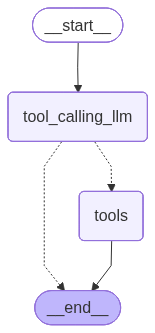

In [26]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [28]:
messages=graph.invoke({"messages":HumanMessage(content="What is AI Agents?")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is AI Agents?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (fc_77d2afe1-e45f-4a3e-98db-003d2cbc45e9)
 Call ID: fc_77d2afe1-e45f-4a3e-98db-003d2cbc45e9
  Args:
    query: Intelligent agent
================================= Tool Message =================================
Name: wikipedia

Page: Intelligent agent
Summary: In artificial intelligence, an intelligent agent is an entity that perceives its environment, takes actions autonomously to achieve goals, and may improve its performance through machine learning or by acquiring knowledge. AI textbooks define artificial intelligence as the "study and design of intelligent agents," emphasizing that goal-directed behavior is central to intelligence.
A specialized subset of intelligent agents, agentic AI (also known as an AI agent o


In [29]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news for November 2025")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 10 recent AI news for November 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fc_79470e31-f0fb-462b-a4eb-0fe255b3f841)
 Call ID: fc_79470e31-f0fb-462b-a4eb-0fe255b3f841
  Args:
    query: AI news November 2025 top stories
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Three Biggest AI Stories in Nov. 2025: 'AI is no longer siloed'", "url": "https://etcjournal.com/2025/11/13/three-biggest-ai-stories-in-nov-2025-ai-is-no-longer-siloed/", "content": "The Keyword’s official recap, “The latest AI news we announced in October,” published on November 4, 2025, offers one of the clearest snapshots of a platform-scale shift: Google aligning workplace AI under Gemini Enterprise, unveiling research tools like Cell2Sentence-Scale for oncolog

In [32]:
messages=graph.invoke({"messages":HumanMessage(content="What is machine learning using tools")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is machine learning using tools
================================== Ai Message ==================================

## Machine Learning – A Quick Overview  

**Machine Learning (ML)** is a sub‑field of artificial intelligence that enables computers to learn patterns from data and make predictions or decisions without being explicitly programmed for each task.  
In essence, you feed a model **examples** (training data), the model discovers the underlying structure, and then you can use it to **infer** on new, unseen data.

### Core Concepts

| Concept | What It Means | Why It Matters |
|---------|---------------|----------------|
| **Data** | The raw observations (numbers, text, images, etc.) that the model learns from. | Quality & quantity of data largely determine model performance. |
| **Features** | Transformations or representations of raw data that make patterns easier to discover (e.g., pixel val